# Analyse des données spatiales

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
import waveletFunctions as wav

Zone de choc entre le vent solaire et la magnétoshpère terrestre.

Date : 31 mars 2001

Mesure CLUSTER

In [2]:
data = readsav('data_choc.sav', verbose=False)

In [3]:
t = data['t_sc']
Bx = data['bx']
By = data['by']
Bz = data['bz']
dt = t[42] - t[41]
K = 3600

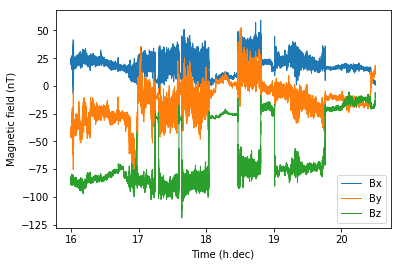

In [4]:
plt.close()
plt.plot(t/K, Bx, label='Bx', linewidth=1)
plt.plot(t/K, By, label='By', linewidth=1)
plt.plot(t/K, Bz, label='Bz', linewidth=1)
plt.xlabel('Time (h.dec)')
plt.ylabel('Magnetic field (nT)')
plt.legend()
plt.show()

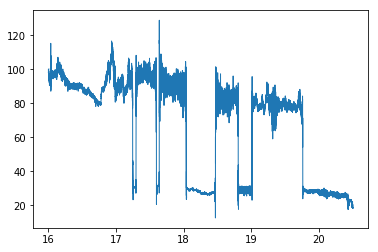

In [7]:
mod = np.sqrt(Bx**2 + By**2 + Bz**2)
plt.close()
plt.plot(t/K, mod, linewidth=1)
plt.show()

Vitesse variable du vent solaire, donc on traverse plusieurs fois le choc.

On se focalise sur un choc grâce au masque suivant : 

In [8]:
mask = ((t < 18.2*K) & (t > 17.8*K))

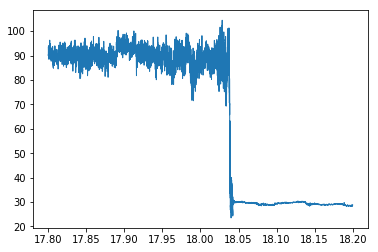

In [9]:
plt.close()
plt.plot(t[mask]/K, mod[mask], linewidth=1)
plt.show()

Nous utilisons coi, le *cone of influence*, en-dehors duquel les résultats ne sont pas physiques, pour éliminer les valeurs non physiques et pouvoir voir avec précision les zones du scalogramme qui nous intéressent.

In [8]:
wave0, period0, scale0, coi0 = wav.wavelet(mod[mask], dt)
zoom = (period0 < 500)
pr = period0[zoom]
w2 = np.abs(wave0[zoom,:])**2

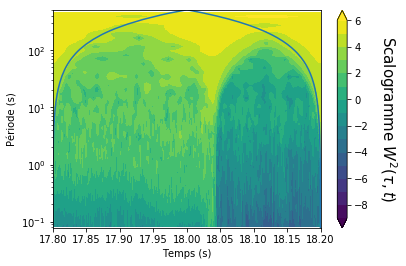

In [9]:
plt.close()
contour_plot = plt.contourf(t[mask]/K, pr, np.log10(w2), 16, extend='both')
plt.plot(t[mask]/K, coi0)
plt.yscale('log')
plt.xlabel('Temps (s)')
plt.ylabel('Période (s)')
plt.ylim((2*dt, 500))
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'Scalogramme $W^{2}(\tau,t)$', rotation=270, labelpad=30, fontsize=15)
plt.show()

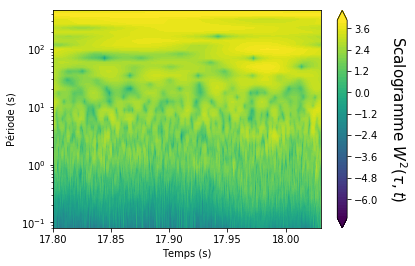

In [10]:
mask2 = ((t < 18.03*K) & (t > 17.8*K))
wave1, period1, scale1, coi1 = wav.wavelet(mod[mask2], dt)
zoom = (period1 < 500)
pr = period1[zoom]
w2 = np.abs(wave1[zoom,:])**2
plt.close()
contour_plot = plt.contourf(t[mask2]/K, pr, np.log10(w2), 100, extend='both')
plt.xlabel('Temps (s)')
plt.ylabel('Période (s)')
plt.yscale('log')
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'Scalogramme $W^{2}(\tau,t)$', rotation=270, labelpad=30, fontsize=15)
plt.show()

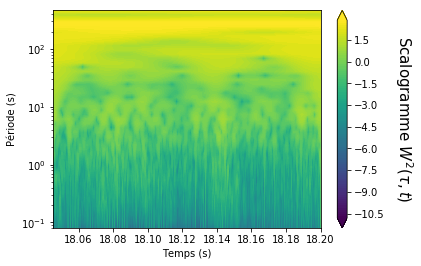

In [11]:
mask3 = ((t < 18.2*K) & (t > 18.045*K))
wave2, period2, scale2, coi2 = wav.wavelet(mod[mask3], dt)
zoom = (period2 < 500)
pr = period2[zoom]
w2 = np.abs(wave2[zoom,:])**2
plt.close()
contour_plot = plt.contourf(t[mask3]/K, pr, np.log10(w2), 100, extend='both')
plt.xlabel('Temps (s)')
plt.ylabel('Période (s)')
plt.yscale('log')
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'Scalogramme $W^{2}(\tau,t)$', rotation=270, labelpad=30, fontsize=15)
plt.show()

**NB :** 
Ces structures verticales dénotent des phénomènes limités dans le temps, mais qui mettent en jeu toutes les échelles du plasma. Au contraire, une onde aurait une fréquence définie, et serait présente dans le temps.

In [10]:
PSD = np.abs(np.fft.rfft(mod))**2
freq = np.fft.rfftfreq(len(mod), dt)

/home/guillaume/miniconda3/envs/obspm/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


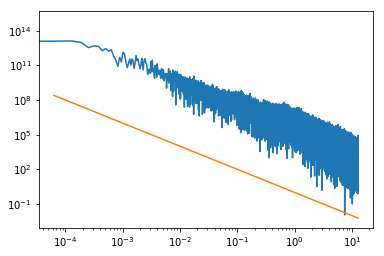

In [11]:
plt.close()
plt.loglog(freq, PSD)
plt.loglog(freq, freq**(-2))
plt.show()

## Analyse composante Bx (question 5)

### Spectre de Fourier

In [12]:
spBx = np.fft.rfft(Bx)
freqBx = np.fft.rfftfreq(len(Bx), dt)

### Spectre des wavelets

On intègre le scalogramme sur la variable temporelle. On obtient alors le spectre des fluctuations.

In [13]:
wavex, periodx, scalex, coix = wav.wavelet(Bx, dt)
spW = np.sum(np.abs(wavex)**2, axis=1)/len(coix)

### Tracé final

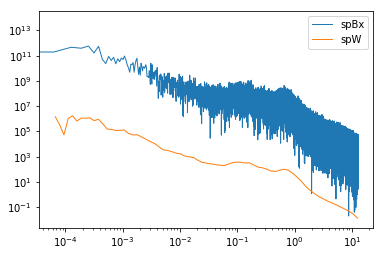

In [15]:
plt.close()
#plt.subplot(311)
#plt.plot(t/K, Bx, linewidth=1)

#plt.subplot(312)
plt.plot(freqBx, np.abs(spBx)**2, linewidth=1, label='spBx')
plt.plot(1/periodx, spW, linewidth=1, label='spW')
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show()